# Home Improvement Retail Financial Data Pipeline
## Personal Project by Alana Ahart


## Project Overview

### The goal of this project was to retrieve and analyze financial data for companies in the home improvement retail industry using the Financial Modeling Prep API. After collecting and preparing the data in Python, I performed time series analysis to forecast revenue for Home Depot and Lowe’s over the next eight quarters. I then designed an interactive Tableau dashboard that compares key financial metrics, such as liquidity ratios and revenue trends, across multiple companies in the industry to assess their overall financial health.


## Tableau Dashboard

[View the interactive dashboard on Tableau Public](https://public.tableau.com/views/HomeImprovement_17613366392310/Story1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

## Tools & Methods 

### Python & Jupyter Notebook
- Used to connect to the **Financial Modeling Prep (FMP) API**
- Extracted financial data 
- Cleaned and transformed data using `pandas` for compatibility with Tableau
- Performed time series forecasting with Prophet for Home Depot and Lowe’s (8-quarter revenue projection)

### Financial Modeling Prep API
- Queried endpoints for:
  - Company financial statements
  - Key ratios (Current, Quick, Cash, Operating Cash Flow)
- Parsed JSON responses into structured dataframes
- Enabled dynamic data retrieval for multiple companies

### Tableau Public
 - Imported cleaned and forecasted data
 - Designed executive finance dashboard with:
     - KPI carousel for liquidity metrics
     - Company level filtering and interactivity
     - Revenue trend comparisons across companies
 - Published dashboard to Tableau Public for sharing

### Integration Workflow
1. **Extract**: Pull financial data from FMP API using Python
2. **Transform**: Clean and reshape data for analysis
3. **Forecast**: Forecast revenue using Prophet
4. **Load**: Export to CSV and import into Tableau
5. **Visualize**: Build interactive dashboard tailored for executive decision-making



## Companies Featured in This Project

This analysis focuses on publicly traded companies in the home improvement retail industry. The financial data was sourced for the following tickers:

- **HD** – The Home Depot  
- **LOW** – Lowe's Companies  
- **FND** – Floor & Decor Holdings  
- **TTSH** – Tile Shop Holdings Inc.  
- **HVT** – Haverty Furniture Companies  
- **ARHS** – Arhaus Inc.  
- **LIVE** – Live Ventures Incorporated  
- **TBHC** – The Brand House Collective Inc.


Install requests, matplotlib, and pandas libraries. 


In [1]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import matplotlib.pyplot as plt 

In [3]:
import os 

In [4]:
current_directory = os.getcwd()
print(current_directory)

/Users/alanaahart/Downloads


In [5]:
os.chdir("/Users/alanaahart/Desktop")

In [6]:
import pandas as pd

Open API key that has been saved to a text file. 

In [7]:
api_key = open('key.txt', 'r').read()


Extract company profiles from API and save to csv file. 

In [13]:
tickers = ['HD', 'LOW', 'FND', 'TBHC','TTSH','HVT','ARHS','LIVE']

In [8]:
all_profiles = []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/profile?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_profiles.extend(data)

# Convert to DataFrame
df_profiles = pd.DataFrame(all_profiles)
df_profiles.columns = [col.lower().replace(' ', '_') for col in df_profiles.columns]


In [33]:
print(df_profiles.head())

  symbol   price     marketcap   beta  lastdividend          range  change  \
0     HD  383.79  382019441252  1.001          9.15  326.31-439.37   -3.02   
1    LOW  237.59  133245095977  0.880          4.65  206.39-287.01   -2.30   
2    FND   70.50    7592248988  1.703          0.00    66.01-122.9    0.12   
3   TBHC    1.72      38633579  1.916          0.00       1.05-2.5    0.05   
4   TTSH    6.28     281101812  0.905          0.00      4.62-7.75   -0.01   

   changepercentage   volume  averagevolume  ...         city state    zip  \
0          -0.78075  2410612        3528660  ...      Atlanta    GA  30339   
1          -0.95877  1900077        2849704  ...  Mooresville    NC  28117   
2           0.17050  2259293        2094337  ...      Atlanta    GA  30339   
3           2.99401    83681         354609  ...    Brentwood    TN  37027   
4          -0.15898   589863          43096  ...     Plymouth    MN  55441   

                                               image     ipoda

In [34]:
#save to csv 
df_profiles.to_csv('home_improvement_profiles.csv', index=False)

Extract company financial scores and save to csv file. 

In [10]:
all_scores = []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/financial-scores?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_scores.extend(data)

# Convert to DataFrame
df_financial_scores = pd.DataFrame(all_scores)
df_financial_scores.columns = [col.lower().replace(' ', '_') for col in df_financial_scores.columns]

In [35]:
print(df_financial_scores.head())

  symbol reportedcurrency  altmanzscore  piotroskiscore  workingcapital  \
0     HD              USD      6.423292               6      4545000000   
1    LOW              USD      3.705499               7      1017000000   
2    FND              USD      3.062168               7       315383000   
3   TBHC              USD      0.028688               2       -25236000   
4   TTSH              USD      2.028549               3        43490000   

    totalassets  retainedearnings         ebit     marketcap  \
0  100049000000       92943000000  21680000000  402733437376   
1   46614000000      -12108000000  10438000000  146031779710   
2    5411247000        1734329000    272845000    7932554049   
3     221930000        -228563000    -25449000      38633579   
4     324110000          -6226000        35000     281773233   

   totalliabilities       revenue  
0       89384000000  165054000000  
1       58014000000   83612000000  
2        3116905000    4600232000  
3         257091000 

In [36]:
df_financial_scores.to_csv('home_improvement_scores.csv', index=False)

Extract company key metrics from API and save to csv file. 

In [14]:
all_key_metrics= []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/key-metrics?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_key_metrics.extend(data)

# Convert to DataFrame
df_key_metrics = pd.DataFrame(all_key_metrics)
df_key_metrics.columns = [col.lower().replace(' ', '_') for col in df_key_metrics.columns]

In [38]:
print(df_key_metrics.head())

  symbol        date fiscalyear period reportedcurrency     marketcap  \
0     HD  2025-02-02       2024     FY              USD  4.046724e+11   
1     HD  2024-01-28       2023     FY              USD  3.553443e+11   
2     HD  2023-01-29       2022     FY              USD  3.211533e+11   
3     HD  2022-01-30       2021     FY              USD  3.867969e+11   
4     HD  2021-01-31       2020     FY              USD  2.900552e+11   

   enterprisevalue  evtosales  evtooperatingcashflow  evtofreecashflow  ...  \
0     4.653034e+11   2.917007              23.488309         28.502505  ...   
1     4.038273e+11   2.645117              19.073649         22.502357  ...   
2     3.687603e+11   2.342778              25.231631         32.077269  ...   
3     4.307229e+11   2.849507              25.992573         30.754939  ...   
4     3.255822e+11   2.464478              17.282349         19.881667  ...   

   averageinventory  daysofsalesoutstanding  daysofpayablesoutstanding  \
0       2221

In [16]:
print(df_key_metrics.columns)

Index(['symbol', 'date', 'fiscalyear', 'period', 'reportedcurrency',
       'marketcap', 'enterprisevalue', 'evtosales', 'evtooperatingcashflow',
       'evtofreecashflow', 'evtoebitda', 'netdebttoebitda', 'currentratio',
       'incomequality', 'grahamnumber', 'grahamnetnet', 'taxburden',
       'interestburden', 'workingcapital', 'investedcapital', 'returnonassets',
       'operatingreturnonassets', 'returnontangibleassets', 'returnonequity',
       'returnoninvestedcapital', 'returnoncapitalemployed', 'earningsyield',
       'freecashflowyield', 'capextooperatingcashflow', 'capextodepreciation',
       'capextorevenue', 'salesgeneralandadministrativetorevenue',
       'researchanddevelopementtorevenue', 'stockbasedcompensationtorevenue',
       'intangiblestototalassets', 'averagereceivables', 'averagepayables',
       'averageinventory', 'daysofsalesoutstanding',
       'daysofpayablesoutstanding', 'daysofinventoryoutstanding',
       'operatingcycle', 'cashconversioncycle', 'freec

In [39]:
df_key_metrics.to_csv('home_improvement_keymetrics.csv', index=False)

Extract company ratios from API and save to csv file. 

In [17]:
all_finance_ratio= []



for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/ratios?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_finance_ratio.extend(data)

# Convert to DataFrame
df_finance_ratios= pd.DataFrame(all_finance_ratio)
df_finance_ratios.columns = [col.lower().replace(' ', '_') for col in df_finance_ratios.columns]

In [40]:
print(df_finance_ratios.head())

  symbol        date fiscalyear period reportedcurrency  grossprofitmargin  \
0     HD  2025-02-02       2024     FY              USD           0.334190   
1     HD  2024-01-28       2023     FY              USD           0.333794   
2     HD  2023-01-29       2022     FY              USD           0.335305   
3     HD  2022-01-30       2021     FY              USD           0.336286   
4     HD  2021-01-31       2020     FY              USD           0.339513   

   ebitmargin  ebitdamargin  operatingprofitmargin  pretaxprofitmargin  ...  \
0    0.136207      0.159453               0.134947            0.121657  ...   
1    0.143231      0.164500               0.142066            0.130505  ...   
2    0.152723      0.171973               0.152723            0.142799  ...   
3    0.152424      0.171649               0.152424            0.143804  ...   
4    0.138354      0.157778               0.138354            0.128514  ...   

   operatingcashflowpershare  capexpershare  freecashflo

In [41]:
df_finance_ratios.to_csv('home_improvement_financeratios.csv', index=False)

Extract company cash flow statements from API and save to csv file. 

In [19]:
all_cash_flows= []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/cash-flow-statement?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_cash_flows.extend(data)

# Convert to DataFrame
df_cash_flows = pd.DataFrame(all_cash_flows)
df_cash_flows.columns = [col.lower().replace(' ', '_') for col in df_cash_flows.columns]



In [42]:
print(df_cash_flows.head())

         date symbol reportedcurrency         cik  filingdate  \
0  2025-01-31     HD              USD  0000354950  2025-03-21   
1  2024-01-31     HD              USD  0000354950  2024-03-13   
2  2023-01-31     HD              USD  0000354950  2023-03-15   
3  2022-01-31     HD              USD  0000354950  2022-03-23   
4  2021-01-31     HD              USD  0000354950  2021-03-24   

          accepteddate fiscalyear period    netincome  \
0  2025-03-20 18:36:42       2024     FY  14806000000   
1  2024-03-13 16:31:59       2023     FY  15143000000   
2  2023-03-15 16:22:15       2022     FY  17105000000   
3  2022-03-23 16:25:53       2021     FY  16433000000   
4  2021-03-24 16:46:14       2020     FY  12866000000   

   depreciationandamortization  ...  netcashprovidedbyfinancingactivities  \
0                   3761000000  ...                            -694000000   
1                   3247000000  ...                          -15443000000   
2                   2975000000  ...

In [21]:
print(df_cash_flows.columns)

Index(['date', 'symbol', 'reportedcurrency', 'cik', 'filingdate',
       'accepteddate', 'fiscalyear', 'period', 'netincome',
       'depreciationandamortization', 'deferredincometax',
       'stockbasedcompensation', 'changeinworkingcapital',
       'accountsreceivables', 'inventory', 'accountspayables',
       'otherworkingcapital', 'othernoncashitems',
       'netcashprovidedbyoperatingactivities',
       'investmentsinpropertyplantandequipment', 'acquisitionsnet',
       'purchasesofinvestments', 'salesmaturitiesofinvestments',
       'otherinvestingactivities', 'netcashprovidedbyinvestingactivities',
       'netdebtissuance', 'longtermnetdebtissuance',
       'shorttermnetdebtissuance', 'netstockissuance',
       'netcommonstockissuance', 'commonstockissuance',
       'commonstockrepurchased', 'netpreferredstockissuance',
       'netdividendspaid', 'commondividendspaid', 'preferreddividendspaid',
       'otherfinancingactivities', 'netcashprovidedbyfinancingactivities',
       'ef

In [43]:
df_cash_flows.to_csv('home_improvement_cashflows.csv', index=False)

Extract company cash flow statements from API and save to csv file. 

In [22]:
all_cash_growth= []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/cash-flow-statement-growth?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_cash_growth.extend(data)

# Convert to DataFrame
df_cash_growth = pd.DataFrame(all_cash_growth)
df_cash_growth.columns = [col.lower().replace(' ', '_') for col in df_cash_growth.columns]


In [44]:
print(df_cash_growth.head())

  symbol        date fiscalyear period reportedcurrency  growthnetincome  \
0     HD  2025-02-02       2024     FY              USD        -0.022255   
1     HD  2024-01-28       2023     FY              USD        -0.114703   
2     HD  2023-01-29       2022     FY              USD         0.040893   
3     HD  2022-01-30       2021     FY              USD         0.277242   
4     HD  2021-01-31       2020     FY              USD         0.144458   

   growthdepreciationandamortization  growthdeferredincometax  \
0                           0.158300                 0.000000   
1                           0.091429                 0.000000   
2                           0.039483                 1.000000   
3                           0.136165                 0.514938   
4                           0.097125                -3.816832   

   growthstockbasedcompensation  growthchangeinworkingcapital  ...  \
0                      0.163158                     -0.667625  ...   
1           

In [24]:
print(df_cash_growth.columns)

Index(['symbol', 'date', 'fiscalyear', 'period', 'reportedcurrency',
       'growthnetincome', 'growthdepreciationandamortization',
       'growthdeferredincometax', 'growthstockbasedcompensation',
       'growthchangeinworkingcapital', 'growthaccountsreceivables',
       'growthinventory', 'growthaccountspayables',
       'growthotherworkingcapital', 'growthothernoncashitems',
       'growthnetcashprovidedbyoperatingactivites',
       'growthinvestmentsinpropertyplantandequipment', 'growthacquisitionsnet',
       'growthpurchasesofinvestments', 'growthsalesmaturitiesofinvestments',
       'growthotherinvestingactivites',
       'growthnetcashusedforinvestingactivites', 'growthdebtrepayment',
       'growthcommonstockissued', 'growthcommonstockrepurchased',
       'growthdividendspaid', 'growthotherfinancingactivites',
       'growthnetcashusedprovidedbyfinancingactivities',
       'growtheffectofforexchangesoncash', 'growthnetchangeincash',
       'growthcashatendofperiod', 'growthcas

In [45]:
df_cash_growth.to_csv('home_improvement_cashgrowth.csv', index=False)

Extract company cash growth data from API and save to csv file. 

In [28]:
all_finance_growth= []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/financial-growth?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_finance_growth.extend(data)

# Convert to DataFrame
df_finance_growth = pd.DataFrame(all_finance_growth)
df_finance_growth.columns = [col.lower().replace(' ', '_') for col in df_finance_growth.columns]

In [46]:
print(df_finance_growth.head())

  symbol        date fiscalyear period reportedcurrency  revenuegrowth  \
0     HD  2025-02-02       2024     FY              USD       0.044836   
1     HD  2024-01-28       2023     FY              USD      -0.030076   
2     HD  2023-01-29       2022     FY              USD       0.041321   
3     HD  2022-01-30       2021     FY              USD       0.144175   
4     HD  2021-01-31       2020     FY              USD       0.198548   

   grossprofitgrowth  ebitgrowth  operatingincomegrowth  netincomegrowth  ...  \
0           0.046075   -0.006402              -0.007515        -0.022255  ...   
1          -0.034446   -0.090353              -0.097758        -0.114703  ...   
2           0.038283    0.043359               0.043359         0.040893  ...   
3           0.133302    0.260532               0.260532         0.277242  ...   
4           0.193788    0.153696               0.153696         0.144458  ...   

   fiveyshareholdersequitygrowthpershare  \
0                       

In [29]:
print(df_finance_growth.columns)

Index(['symbol', 'date', 'fiscalyear', 'period', 'reportedcurrency',
       'revenuegrowth', 'grossprofitgrowth', 'ebitgrowth',
       'operatingincomegrowth', 'netincomegrowth', 'epsgrowth',
       'epsdilutedgrowth', 'weightedaveragesharesgrowth',
       'weightedaveragesharesdilutedgrowth', 'dividendspersharegrowth',
       'operatingcashflowgrowth', 'receivablesgrowth', 'inventorygrowth',
       'assetgrowth', 'bookvaluepersharegrowth', 'debtgrowth',
       'rdexpensegrowth', 'sgaexpensesgrowth', 'freecashflowgrowth',
       'tenyrevenuegrowthpershare', 'fiveyrevenuegrowthpershare',
       'threeyrevenuegrowthpershare', 'tenyoperatingcfgrowthpershare',
       'fiveyoperatingcfgrowthpershare', 'threeyoperatingcfgrowthpershare',
       'tenynetincomegrowthpershare', 'fiveynetincomegrowthpershare',
       'threeynetincomegrowthpershare', 'tenyshareholdersequitygrowthpershare',
       'fiveyshareholdersequitygrowthpershare',
       'threeyshareholdersequitygrowthpershare',
       'teny

In [47]:
df_finance_growth.to_csv('home_improvement_financegrowth.csv', index=False)

Extract balance sheet statement growth from API and save to csv file. 

In [31]:
all_balance_growth= []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/balance-sheet-statement-growth?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_balance_growth.extend(data)

# Convert to DataFrame
df_balance_growth = pd.DataFrame(all_balance_growth)
df_balance_growth.columns = [col.lower().replace(' ', '_') for col in df_balance_growth.columns]

In [48]:
print(df_balance_growth.head())

  symbol        date fiscalyear period reportedcurrency  \
0     HD  2025-02-02       2024     FY              USD   
1     HD  2024-01-28       2023     FY              USD   
2     HD  2023-01-29       2022     FY              USD   
3     HD  2022-01-30       2021     FY              USD   
4     HD  2021-01-31       2020     FY              USD   

   growthcashandcashequivalents  growthshortterminvestments  \
0                     -0.558777                         0.0   
1                      0.363801                         0.0   
2                      0.176697                         0.0   
3                     -0.703230                         0.0   
4                      2.701360                         0.0   

   growthcashandshortterminvestments  growthnetreceivables  growthinventory  \
0                          -0.558777              0.473257         0.117992   
1                           0.363801              0.003316        -0.157116   
2                           0

In [49]:
df_balance_growth.to_csv('home_improvement_balancegrowth.csv', index=False)

Extract geographic segementation data from API and save to csv file. 

In [19]:
all_rev_geo= []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/revenue-geographic-segmentation?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_rev_geo.extend(data)

# Convert to DataFrame
df_rev_geo = pd.DataFrame(all_rev_geo)
df_rev_geo.columns = [str(col).lower().replace(' ', '_') for col in df_rev_geo.columns]

In [21]:
df_rev_geo.to_csv('home_improvement_revgeo.csv', index=False)

In [20]:
print(df_rev_geo.columns)

Index(['symbol', 'fiscalyear', 'period', 'reportedcurrency', 'date', 'data'], dtype='object')


Extract product segmentation data from API and save to csv file. 

In [26]:
all_rev_prod= []

for ticker in tickers:
    url = f'https://financialmodelingprep.com/stable/revenue-product-segmentation?symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if data:
        all_rev_prod.extend(data)


In [28]:
records = []

for entry in all_rev_prod:
    symbol = entry.get('symbol')
    fiscal_year = entry.get('fiscalYear')
    date = entry.get('date')
    data = entry.get('data', {})

    for category, revenue in data.items():
        # Flag if it's a major product line
        is_major = 'Y' if 'Major Product Line' in category else 'N'

        # Clean product category name
        clean_category = category.replace('Major Product Line - ', '').replace('Major Product Line, ', '').strip()

        records.append({
            'symbol': symbol,
            'fiscalYear': fiscal_year,
            'date': date,
            'major_product_line': is_major,
            'product_category': clean_category,
            'revenue': revenue
        })

# Convert to DataFrame
df_clean = pd.DataFrame(records)

# Clean column names
df_clean.columns = [col.lower().replace(' ', '_') for col in df_clean.columns]

# Preview
print(df_clean.head())


  symbol  fiscalyear        date major_product_line    product_category  \
0     HD        2024  2025-02-02                  Y  Building Materials   
1     HD        2024  2025-02-02                  Y           Hardlines   
2     HD        2024  2025-02-02                  Y               Décor   
3     HD        2024  2025-02-02                  N       Other Segment   
4     HD        2023  2024-01-28                  Y  Building Materials   

       revenue  
0  52756000000  
1  48562000000  
2  51790000000  
3   6406000000  
4  52661000000  


In [32]:
df_clean.to_csv('home_improvement_revprod.csv', index=False)

## Projected Revenue Trends for Home Depot

Retrieved 40 quarters of Home Depot’s income statement data using the Financial Modeling Prep API for time series analysis.

In [8]:
ticker = "HD"
url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period=quarter&limit=40&apikey={api_key}"

response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')


In [9]:
print(df.columns)

Index(['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate',
       'acceptedDate', 'calendarYear', 'period', 'revenue', 'costOfRevenue',
       'grossProfit', 'grossProfitRatio', 'researchAndDevelopmentExpenses',
       'generalAndAdministrativeExpenses', 'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestIncome',
       'interestExpense', 'depreciationAndAmortization', 'ebitda',
       'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')


In [11]:
revenue_series = df.set_index('date')['revenue']


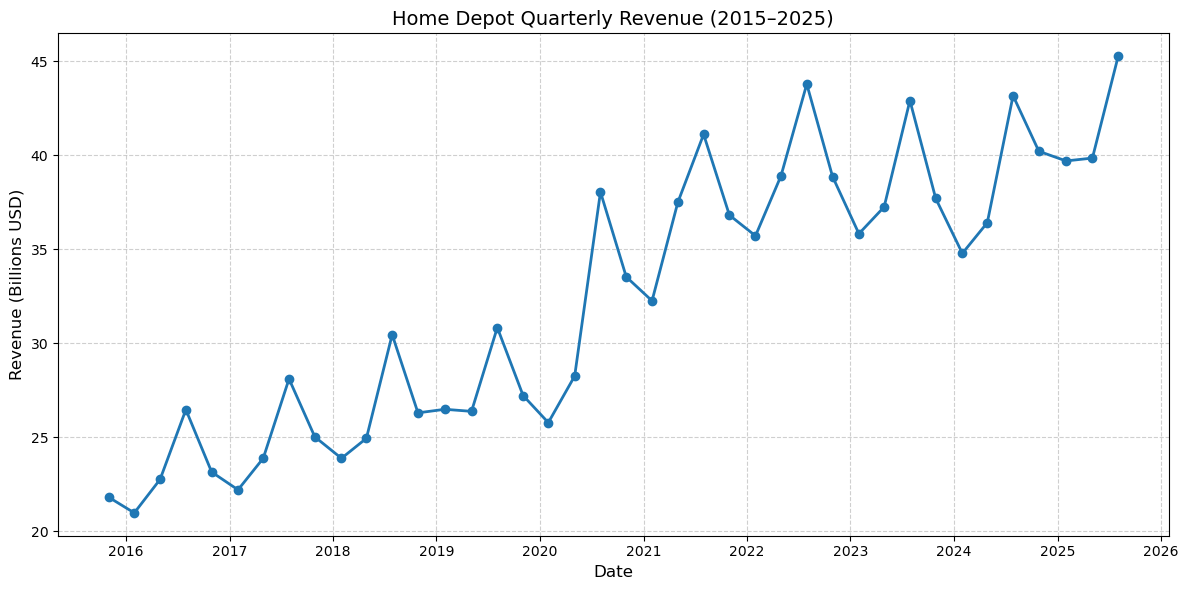

In [12]:
plt.figure(figsize=(12,6))
plt.plot(revenue_series.index, revenue_series.values / 1e9, marker='o', linewidth=2)

# Labels and formatting
plt.title("Home Depot Quarterly Revenue (2015–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue (Billions USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Home Depot’s revenue exhibits a clear upward trend over time. A preliminary glance at the line chart suggests potential seasonality, with recurring peaks and troughs that indicate consistent patterns in high and low revenue periods. 

In [13]:
revenue_series.info()
revenue_series.describe()
revenue_series.isna().sum()


<class 'pandas.core.series.Series'>
DatetimeIndex: 40 entries, 2015-11-01 to 2025-08-03
Series name: revenue
Non-Null Count  Dtype
--------------  -----
40 non-null     int64
dtypes: int64(1)
memory usage: 640.0 bytes


np.int64(0)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

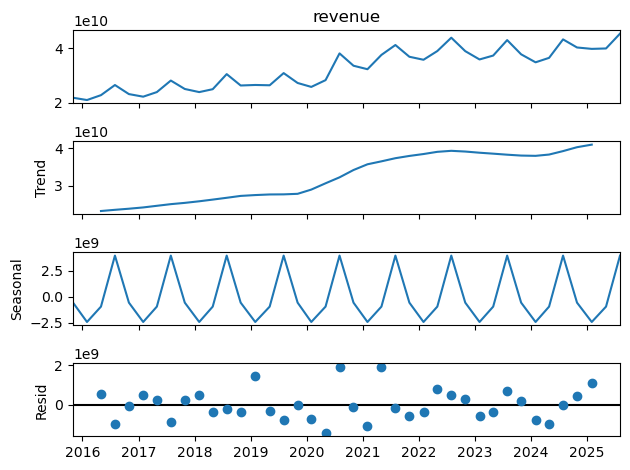

In [15]:
result = seasonal_decompose(revenue_series, model='additive', period=4)
result.plot()
plt.show()


The decomposition plot highlights steady revenue growth for Home Depot, paired with strong seasonal patterns. These seasonal fluctuations should be carefully factored into the time series model to ensure accurate forecasting.

In [16]:
from statsmodels.tsa.stattools import adfuller


In [17]:
result = adfuller(revenue_series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -0.7394714448073285
p-value: 0.8362589794425752


Checked to make sure that the data isn't stationary using an ADP test. The p-value is greater than 0.05, indicating that the data isn't stationary. 

Given the non stationary nature of the data and the presence of strong seasonality, the Prophet model was used to forecast Home Depot’s revenue over the next eight quarters. 

In [18]:
!pip install prophet


In [19]:
from prophet import Prophet


In [20]:
df_prophet = revenue_series.reset_index()
df_prophet.columns = ['ds', 'y']  

df_prophet['y'] = df_prophet['y'] / 1e9  


Align dates to quarter end. 

In [22]:
df_prophet['ds'] = (
    pd.to_datetime(df_prophet['ds'])
      .dt.to_period('Q')
      .dt.to_timestamp(how='end')   
)
df_prophet = (df_prophet
              .sort_values('ds')
              .drop_duplicates(subset='ds', keep='last')
              .reset_index(drop=True))






In [23]:
 print(df_prophet.isna().sum())
 print(df_prophet.head())

ds    0
y     0
dtype: int64
                             ds       y
0 2015-12-31 23:59:59.999999999  21.819
1 2016-03-31 23:59:59.999999999  20.980
2 2016-06-30 23:59:59.999999999  22.762
3 2016-09-30 23:59:59.999999999  26.472
4 2016-12-31 23:59:59.999999999  23.154


21:20:45 - cmdstanpy - INFO - Chain [1] start processing
21:20:45 - cmdstanpy - INFO - Chain [1] done processing


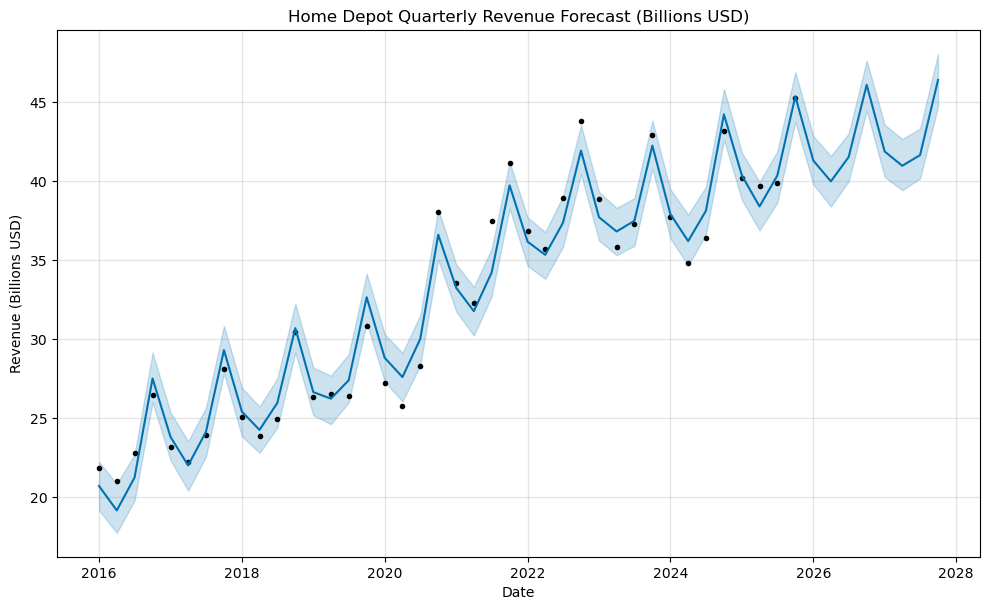

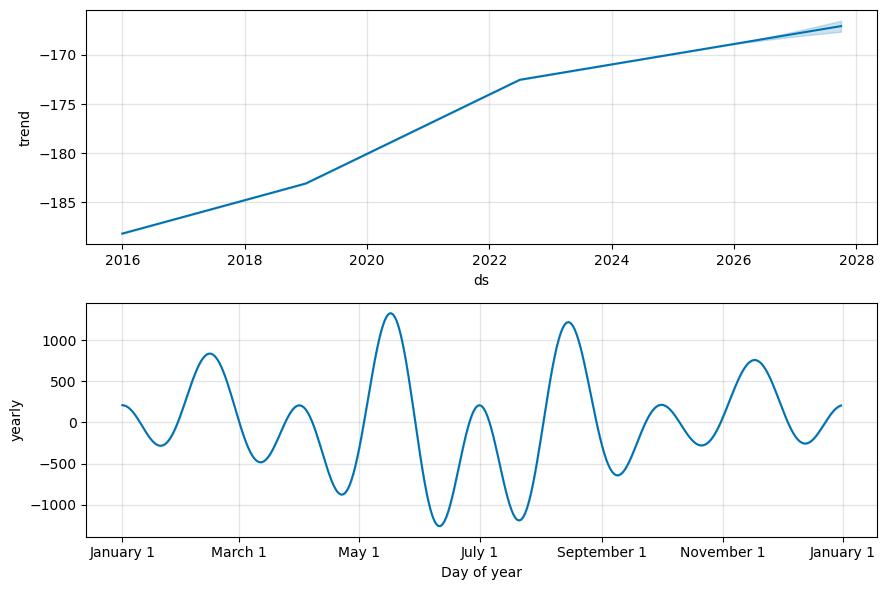

In [25]:
m = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,   
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=8, freq='QE-DEC') 
forecast = m.predict(future)


m.plot(forecast)
plt.title("Home Depot Quarterly Revenue Forecast (Billions USD)")
plt.ylabel("Revenue (Billions USD)")
plt.xlabel("Date")
plt.show()


m.plot_components(forecast)
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [28]:
cmp = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='left')
mape_score = mape(cmp['y'], cmp['yhat'])
print(f"MAPE: {mape_score*100:.2f}%")


MAPE: 3.16%


The accuracy of the Prophet model was evaluated using the Mean Absolute Percentage Error (MAPE). A MAPE score of 3.16% indicates that the model’s predictions are, on average, only 3.16% off from the actual revenue, demonstrating high accuracy.

In [29]:
# Create USD columns (multiply by 1e9)
forecast['yhat_usd'] = forecast['yhat'] * 1e9
forecast['yhat_lower_usd'] = forecast['yhat_lower'] * 1e9
forecast['yhat_upper_usd'] = forecast['yhat_upper'] * 1e9

# Display the last few forecast rows with both units
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper', 
        'yhat_usd', 'yhat_lower_usd', 'yhat_upper_usd']
forecast[cols].tail(8)



,ds,yhat,yhat_lower,yhat_upper,yhat_usd,yhat_lower_usd,yhat_upper_usd
40,2025-12-31 23:59:59.999999999,41.301862,39.793622,42.844915,4.130186e+10,3.979362e+10,4.284492e+10
41,2026-03-31 23:59:59.999999999,39.981384,38.383059,41.594731,3.998138e+10,3.838306e+10,4.159473e+10
42,2026-06-30 23:59:59.999999999,41.524588,39.991951,43.021990,4.152459e+10,3.999195e+10,4.302199e+10
43,2026-09-30 23:59:59.999999999,46.096294,44.455685,47.629139,4.609629e+10,4.445569e+10,4.762914e+10
44,2026-12-31 23:59:59.999999999,41.874254,40.255816,43.566623,4.187425e+10,4.025582e+10,4.356662e+10
45,2027-03-31 23:59:59.999999999,40.969778,39.418893,42.666064,4.096978e+10,3.941889e+10,4.266606e+10
46,2027-06-30 23:59:59.999999999,41.644289,40.160969,43.330384,4.164429e+10,4.016097e+10,4.333038e+10
47,2027-09-30 23:59:59.999999999,46.407875,44.737287,48.053262,4.640787e+10,4.473729e+10,4.805326e+10


In [61]:
cmp = df_prophet.merge(
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
    on='ds',
    how='left'
)


future_forecast_HD = forecast[forecast['ds'] > df_prophet['ds'].max()][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


final_table_HD = pd.concat([cmp, future_forecast_HD], ignore_index=True)

final_table_HD['y'] = final_table_HD['y'].round(2)
final_table_HD['yhat'] = final_table_HD['yhat'].round(2)
final_table_HD['yhat_lower'] = final_table_HD['yhat_lower'].round(2)
final_table_HD['yhat_upper'] = final_table_HD['yhat_upper'].round(2)


final_table_HD.rename(columns={
    'ds': 'Date',
    'y': 'Actual Revenue',
    'yhat': 'Forecast Revenue',
    'yhat_lower': 'Lower Bound',
    'yhat_upper': 'Upper Bound'
}, inplace=True)

print(final_table_HD.tail(10))

                            Date  Actual Revenue  Forecast Revenue  \
38 2025-06-30 23:59:59.999999999           39.86             40.35   
39 2025-09-30 23:59:59.999999999           45.28             45.37   
40 2025-12-31 23:59:59.999999999             NaN             41.30   
41 2026-03-31 23:59:59.999999999             NaN             39.98   
42 2026-06-30 23:59:59.999999999             NaN             41.52   
43 2026-09-30 23:59:59.999999999             NaN             46.10   
44 2026-12-31 23:59:59.999999999             NaN             41.87   
45 2027-03-31 23:59:59.999999999             NaN             40.97   
46 2027-06-30 23:59:59.999999999             NaN             41.64   
47 2027-09-30 23:59:59.999999999             NaN             46.41   

    Lower Bound  Upper Bound  
38        38.62        41.88  
39        43.76        46.92  
40        39.79        42.84  
41        38.38        41.59  
42        39.99        43.02  
43        44.46        47.63  
44        40

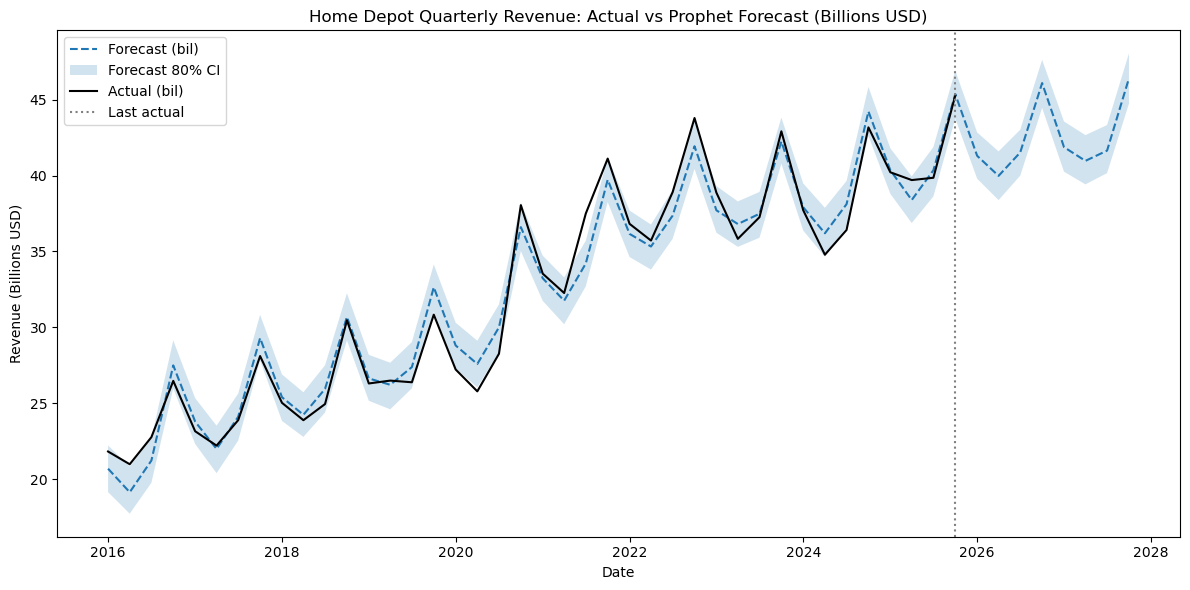

In [32]:
cutoff = df_prophet['ds'].max()  # last actual date
plt.figure(figsize=(12,6))
plt.plot(out['ds'], out['yhat'], label='Forecast (bil)', linestyle='--')
plt.fill_between(out['ds'], out['yhat_lower'], out['yhat_upper'], alpha=0.2, label='Forecast 80% CI')
plt.plot(out['ds'], out['actual_bil'], 'k-', label='Actual (bil)')

# vertical line at cutoff
plt.axvline(cutoff, color='gray', linestyle=':', label='Last actual')

plt.title('Home Depot Quarterly Revenue: Actual vs Prophet Forecast (Billions USD)')
plt.ylabel('Revenue (Billions USD)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()


## Projected Revenue Trends for Lowe's Home Improvement

Retrieved Lowe's income statements for the same amount of periods that was used for Home Depot's forecast. 

In [39]:
ticker_low = "LOW"
url_low = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker_low}?period=quarter&limit=40&apikey={api_key}"

response_low = requests.get(url_low)
data_low = response_low.json()

# Convert to DataFrame
df_low = pd.DataFrame(data_low)
df_low['date'] = pd.to_datetime(df_low['date'])
df_low = df_low.sort_values('date')

In [40]:
revenue_low = df_low.set_index('date')['revenue']

In [41]:
print(df_low.tail(8))
print("min:", df_low['revenue'].min(), "max:", df_low['revenue'].max())

        date symbol reportedCurrency         cik fillingDate  \
7 2023-11-03    LOW              USD  0000060667  2023-11-29   
6 2024-01-31    LOW              USD  0000060667  2024-03-25   
5 2024-05-03    LOW              USD  0000060667  2024-05-30   
4 2024-08-02    LOW              USD  0000060667  2024-08-29   
3 2024-11-01    LOW              USD  0000060667  2024-11-27   
2 2025-01-31    LOW              USD  0000060667  2025-03-24   
1 2025-05-02    LOW              USD  0000060667  2025-05-29   
0 2025-08-01    LOW              USD  0000060667  2025-08-28   

          acceptedDate calendarYear period      revenue  costOfRevenue  ...  \
7  2023-11-29 16:16:49         2023     Q3  20471000000    14014000000  ...   
6  2024-03-25 16:18:34         2023     Q4  18602000000    13018000000  ...   
5  2024-05-30 16:25:58         2024     Q1  21364000000    14702000000  ...   
4  2024-08-29 16:32:21         2024     Q2  23586000000    16114000000  ...   
3  2024-11-27 16:14:48      

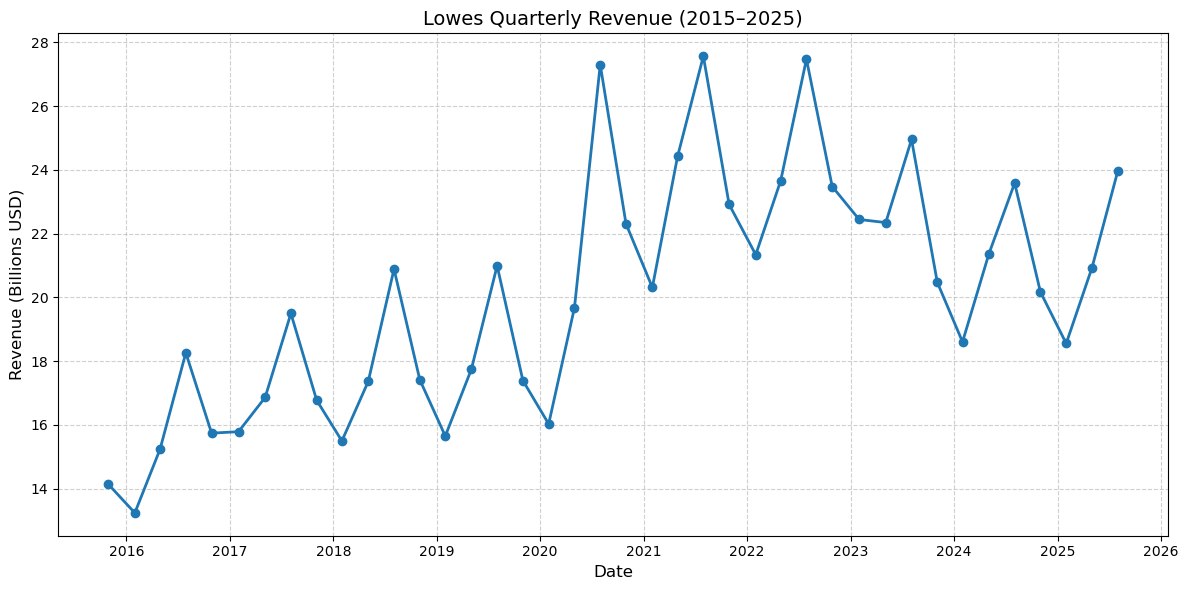

In [42]:
plt.figure(figsize=(12,6))
plt.plot(revenue_low.index, revenue_low.values / 1e9, marker='o', linewidth=2)

plt.title("Lowes Quarterly Revenue (2015–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue (Billions USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Following 2020, Lowe’s revenue surged, likely influenced by pandemic era behavior as consumers focused on home upgrades. The time series also exhibits strong seasonality, marked by consistent patterns of highs and lows across quarters.

In [43]:
revenue_low.info()
revenue_low.describe()
revenue_low.isna().sum()

<class 'pandas.core.series.Series'>
DatetimeIndex: 40 entries, 2015-10-30 to 2025-08-01
Series name: revenue
Non-Null Count  Dtype
--------------  -----
40 non-null     int64
dtypes: int64(1)
memory usage: 640.0 bytes


np.int64(0)

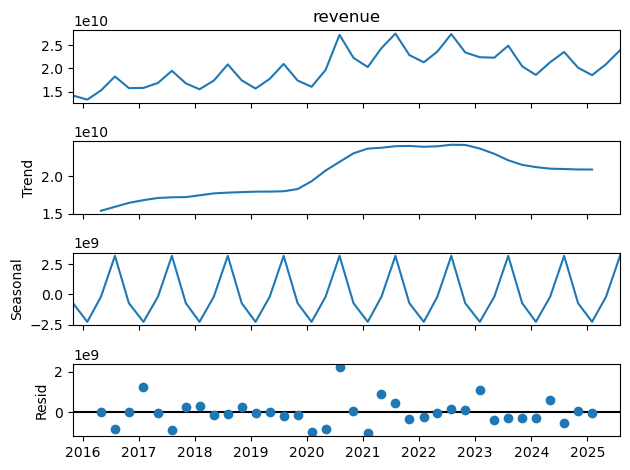

In [44]:
result = seasonal_decompose(revenue_low, model='additive', period=4)
result.plot()
plt.show()

Strong seasonality is present and the Prophet model will be used for Lowe's forecast as well. 

In [45]:
result_low = adfuller(revenue_low)
print(f"ADF Statistic: {result_low[0]}")
print(f"p-value: {result_low[1]}")

ADF Statistic: -1.7353033794813206
p-value: 0.41302099915348145


In [46]:
df_prophet_low = revenue_low.reset_index()
df_prophet_low.columns = ['ds', 'y']  

df_prophet_low['y'] = df_prophet_low['y'] / 1e9

In [47]:
df_prophet_low['ds'] = (
    pd.to_datetime(df_prophet_low['ds'])
      .dt.to_period('Q')
      .dt.to_timestamp(how='end')  
)
df_prophet_low = (df_prophet_low
              .sort_values('ds')
              .drop_duplicates(subset='ds', keep='last')
              .reset_index(drop=True))


In [48]:
 print(df_prophet_low.isna().sum())
 print(df_prophet_low.head())

ds    0
y     0
dtype: int64
                             ds       y
0 2015-12-31 23:59:59.999999999  14.129
1 2016-03-31 23:59:59.999999999  13.236
2 2016-06-30 23:59:59.999999999  15.234
3 2016-09-30 23:59:59.999999999  18.260
4 2016-12-31 23:59:59.999999999  15.739


In [67]:
m_low = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)
m_low.fit(df_prophet_low)

future_low = m_low.make_future_dataframe(periods=8, freq='QE')
forecast_low = m_low.predict(future_low)


13:53:27 - cmdstanpy - INFO - Chain [1] start processing
13:53:27 - cmdstanpy - INFO - Chain [1] done processing


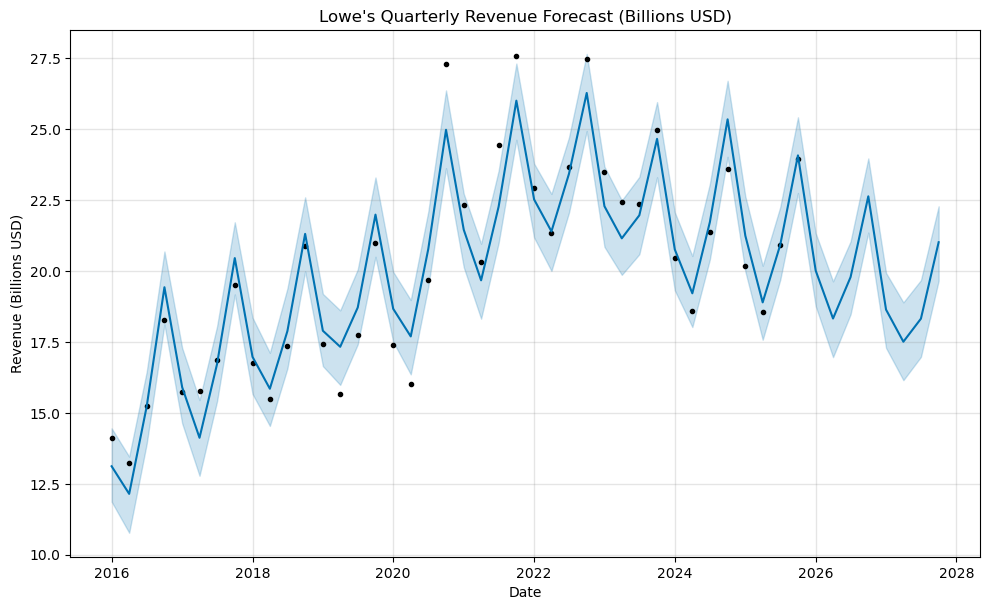

In [68]:
fig1 = m_low.plot(forecast_low)
plt.title("Lowe's Quarterly Revenue Forecast (Billions USD)")
plt.xlabel("Date")
plt.ylabel("Revenue (Billions USD)")
plt.show()


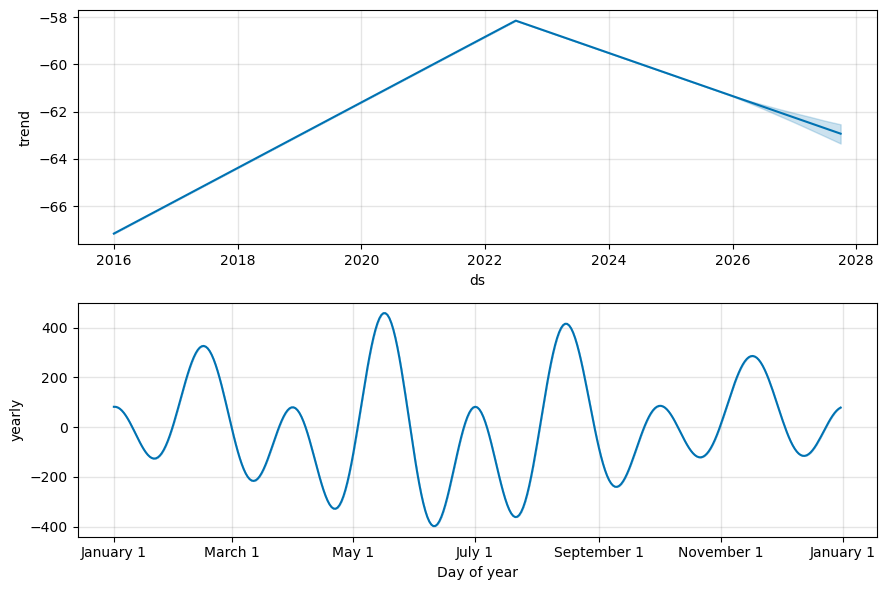

In [69]:
fig2 = m_low.plot_components(forecast_low)
plt.show()


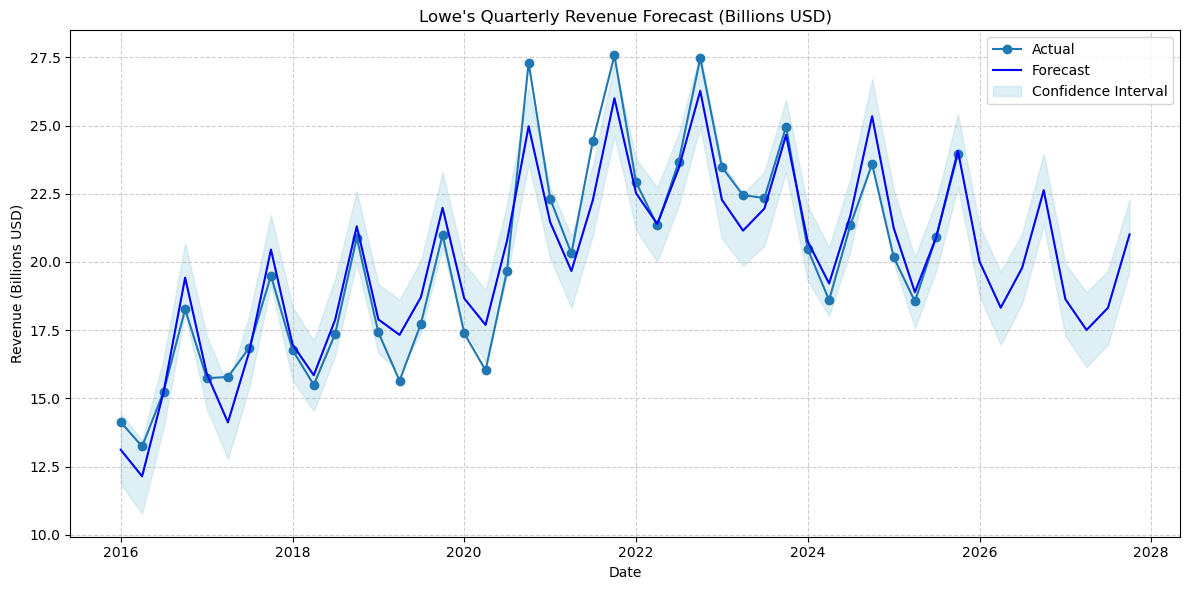

In [70]:
plt.figure(figsize=(12,6))
plt.plot(df_prophet_low['ds'], df_prophet_low['y'], label='Actual', marker='o')
plt.plot(forecast_low['ds'], forecast_low['yhat'], label='Forecast', color='blue')
plt.fill_between(
    forecast_low['ds'],
    forecast_low['yhat_lower'],
    forecast_low['yhat_upper'],
    color='lightblue', alpha=0.4, label='Confidence Interval'
)

plt.title("Lowe's Quarterly Revenue Forecast (Billions USD)")
plt.xlabel("Date")
plt.ylabel("Revenue (Billions USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Check the accuracy of the model. 

In [71]:
cmp = df_prophet_low.merge(forecast_low[['ds', 'yhat']], on='ds', how='left')
mape_score = mape(cmp['y'], cmp['yhat'])

print(f"MAPE: {mape_score*100:.2f}%")


MAPE: 4.18%


The MAPE score for the Lowe's forecast is 4.18%, indicating that the model's predictions are, on average, only 4% off from the actual revenue. This is an excellent score and demonstrates high model accuracy. After the model was checked for accuracy, a table was created to compare actual revenue values vs. forecasted. 

In [72]:
 cmp = df_prophet_low.merge(
    forecast_low[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
    on='ds',
    how='left'
)


future_forecast = forecast_low[forecast_low['ds'] > df_prophet_low['ds'].max()][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


final_table = pd.concat([cmp, future_forecast], ignore_index=True)

final_table['y'] = final_table['y'].round(2)
final_table['yhat'] = final_table['yhat'].round(2)
final_table['yhat_lower'] = final_table['yhat_lower'].round(2)
final_table['yhat_upper'] = final_table['yhat_upper'].round(2)


final_table.rename(columns={
    'ds': 'Date',
    'y': 'Actual Revenue',
    'yhat': 'Forecast Revenue',
    'yhat_lower': 'Lower Bound',
    'yhat_upper': 'Upper Bound'
}, inplace=True)

print(final_table.tail(10))


                            Date  Actual Revenue  Forecast Revenue  \
38 2025-06-30 23:59:59.999999999           20.93             20.92   
39 2025-09-30 23:59:59.999999999           23.96             24.07   
40 2025-12-31 23:59:59.999999999             NaN             20.01   
41 2026-03-31 23:59:59.999999999             NaN             18.32   
42 2026-06-30 23:59:59.999999999             NaN             19.78   
43 2026-09-30 23:59:59.999999999             NaN             22.63   
44 2026-12-31 23:59:59.999999999             NaN             18.64   
45 2027-03-31 23:59:59.999999999             NaN             17.50   
46 2027-06-30 23:59:59.999999999             NaN             18.32   
47 2027-09-30 23:59:59.999999999             NaN             21.01   

    Lower Bound  Upper Bound  
38        19.68        22.25  
39        22.74        25.41  
40        18.76        21.33  
41        16.96        19.63  
42        18.47        21.04  
43        21.35        23.97  
44        17

Created table that shows actual vs forecasted revenue for Lowe's Home Improvement. 

Combined the dataframes for easy export to Tableau. 

In [73]:
final_table['Ticker'] = 'LOW'
final_table_HD['Ticker'] = 'HD'



In [74]:
combined_table = pd.concat([final_table, final_table_HD], ignore_index=True)


In [75]:
print(combined_table.head)

<bound method NDFrame.head of                             Date  Actual Revenue  Forecast Revenue  \
0  2015-12-31 23:59:59.999999999           14.13             13.12   
1  2016-03-31 23:59:59.999999999           13.24             12.14   
2  2016-06-30 23:59:59.999999999           15.23             15.23   
3  2016-09-30 23:59:59.999999999           18.26             19.42   
4  2016-12-31 23:59:59.999999999           15.74             15.90   
..                           ...             ...               ...   
91 2026-09-30 23:59:59.999999999             NaN             46.10   
92 2026-12-31 23:59:59.999999999             NaN             41.87   
93 2027-03-31 23:59:59.999999999             NaN             40.97   
94 2027-06-30 23:59:59.999999999             NaN             41.64   
95 2027-09-30 23:59:59.999999999             NaN             46.41   

    Lower Bound  Upper Bound Ticker  
0         11.87        14.45    LOW  
1         10.77        13.46    LOW  
2         13.91

In [76]:
combined_table.to_csv('home_improvement_forecasts.csv', index=False)
print(" Saved: home_improvement_forecasts.csv")

 Saved: home_improvement_forecasts.csv
